In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading and displaying the dataset

df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Understanding the data

In [3]:
# number of rows and columns in the dataset

df.shape

(150, 5)

In [4]:
# datatypes of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Statistical description of numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Data Cleaning

In [6]:
# Checking for duplicates

df.duplicated().sum()

3

In [7]:
# Dropping duplicate values

df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

# Analysis

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 1.0, 'Count of Species')

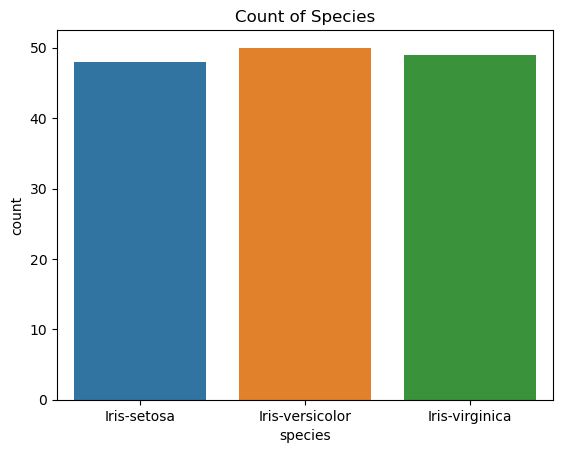

In [10]:
# Bar graphs showing species count on the dataset

sns.countplot(data = df, x = "species")
plt.title("Count of Species")

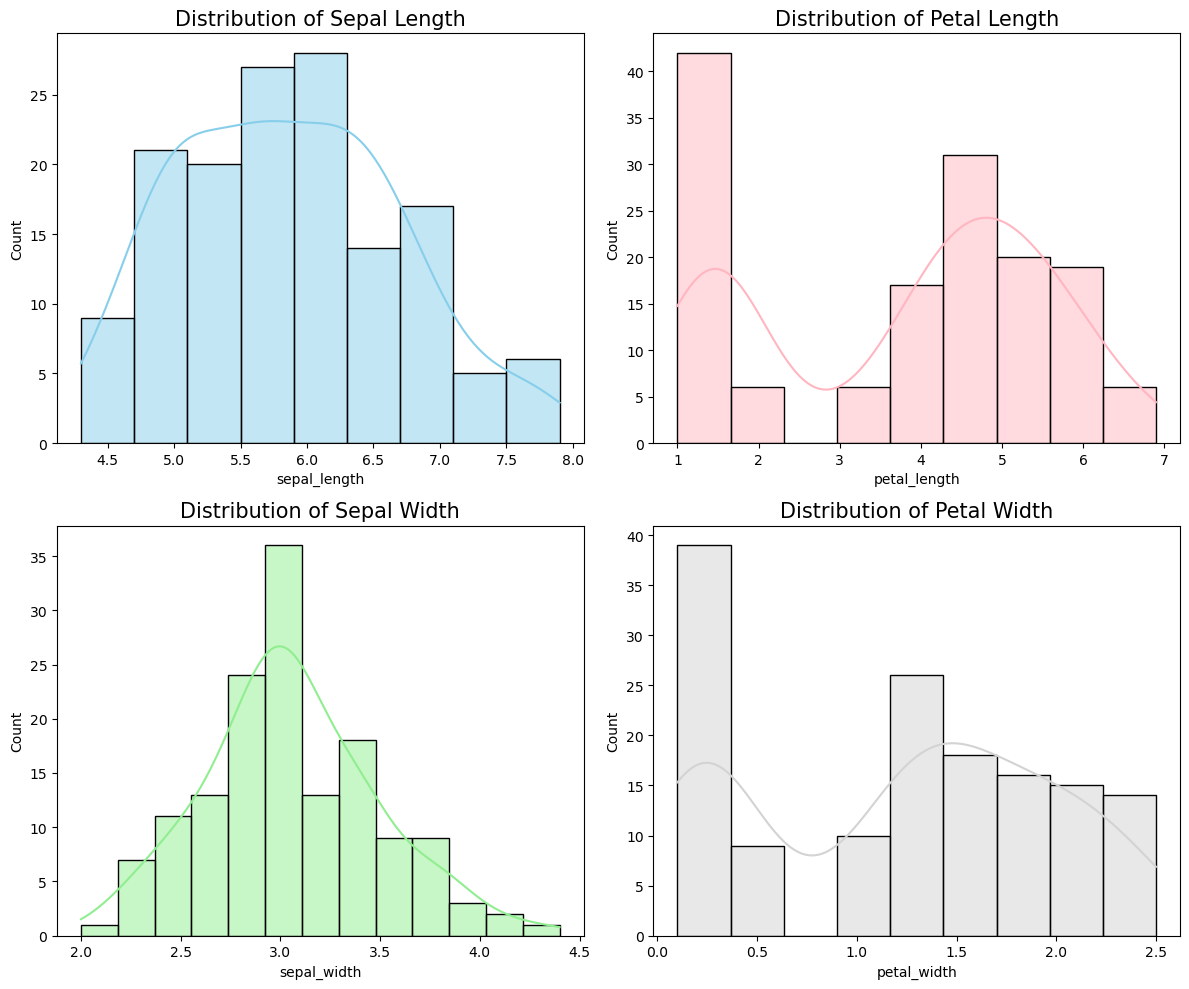

In [11]:
# Histograms

plt.figure(figsize=(12, 10))

# First subplot: Sepal length count
plt.subplot(2,2,1) 
sns.histplot(data = df, x = "sepal_length", kde = True, color = "skyblue")
plt.title("Distribution of Sepal Length", fontsize = 15)

# Second subplot: Petal length count
plt.subplot(2,2,2) 
sns.histplot(data = df, x = "petal_length", kde = True, color = "lightpink")
plt.title("Distribution of Petal Length", fontsize = 15)

# Third subplot: Sepal Width count
plt.subplot(2,2,3) 
sns.histplot(data = df, x = "sepal_width", kde = True, color = "lightgreen")
plt.title("Distribution of Sepal Width", fontsize = 15)

# Fourth subplot: Petal Width count
plt.subplot(2,2,4) 
sns.histplot(data = df, x = "petal_width", kde = True, color = "lightgrey")
plt.title("Distribution of Petal Width", fontsize = 15)

plt.tight_layout()
plt.show()

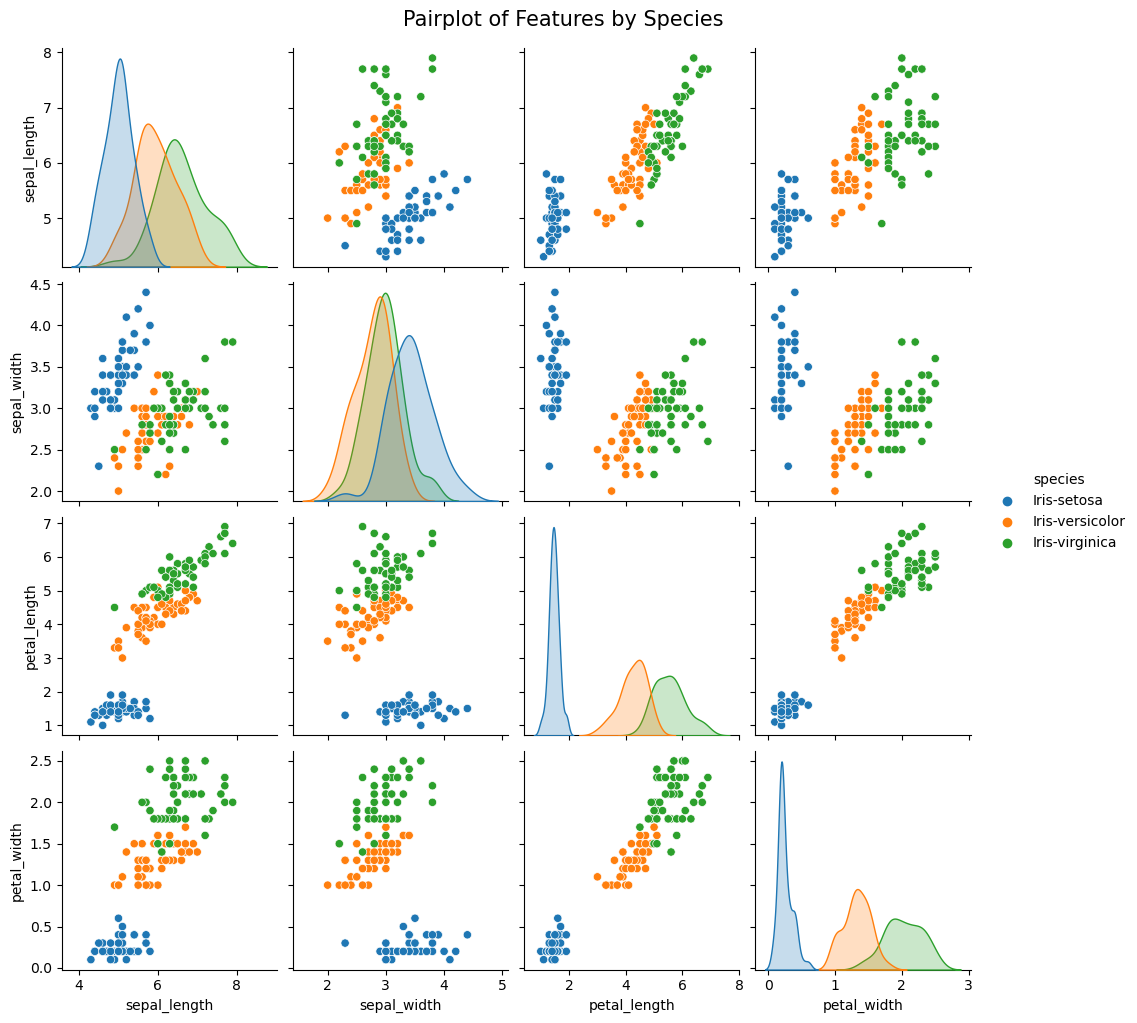

In [12]:
# Pairplot 

sns.pairplot(data = df, hue="species")
plt.suptitle("Pairplot of Features by Species", y=1.02, fontsize=15)
plt.show()

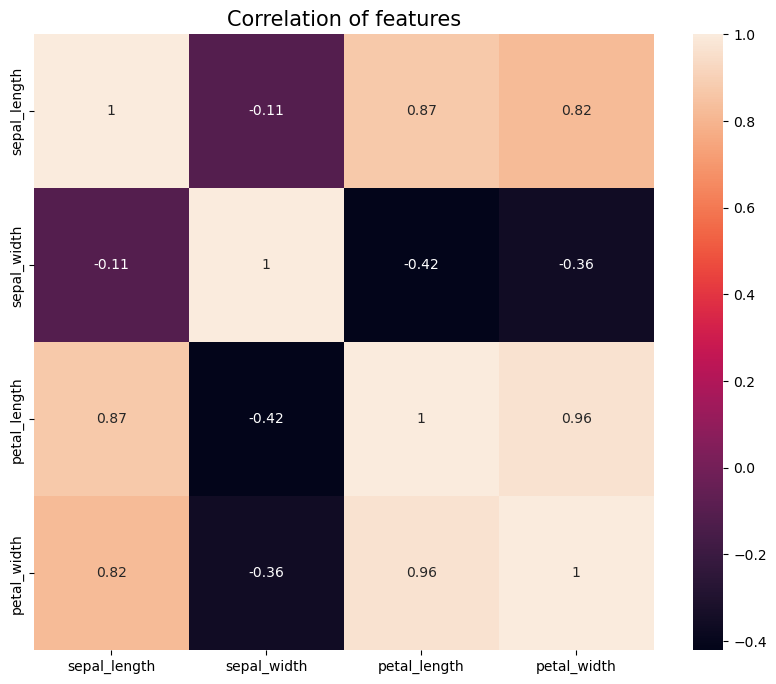

In [13]:
# plotting correlation heatmap 

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True) 
plt.title("Correlation of features", fontsize = 15)
plt.show()

# Data Preparation

In [14]:
# Checking for na values

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
# Checking for non numeric values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [16]:
# Converting 'Embarked' column to numerical 

df = df.replace({'species': {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2}})

In [17]:
# Checking for non numeric values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


# Prediction

In [18]:
# defining feature and target variables

x = df.drop(['species'], axis = 1)
y = df['species']

In [19]:
# splitting data into testing and training model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

### K-Nearest Neighbors

In [20]:
# KNN model

knn = KNeighborsClassifier()

In [21]:
# Using model

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
# getting the accuracy

accuracy_knn = knn.score(x_test, y_test)
print("The accuracy is: " + str(accuracy_knn))

The accuracy is: 0.9333333333333333
